# Plotting chaotic dynamic systems
Inspired by reading James Cleick's *Chaos: Making a New Science* <br>
Included are a Lorenz system and Rossler system

In [1]:
import math


class LorenzSystem:
    def __init__(self,sigma, rho, beta, start_x, start_y, start_z):
        self.sigma=sigma
        self.rho=rho
        self.beta = beta
        self.x=start_x
        self.y=start_y
        self.z=start_z
    def update(self, dt):
        update_x = self.sigma*(self.y-self.x)
        update_y = self.x*(self.rho-self.z)-self.y
        update_z = self.x*self.y-self.beta*self.z
        self.x+=update_x*dt
        self.y+=update_y*dt
        self.z+=update_z*dt
    def get_values(self):
        return [self.x,self.y,self.z]

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,5))

<Figure size 800x500 with 0 Axes>

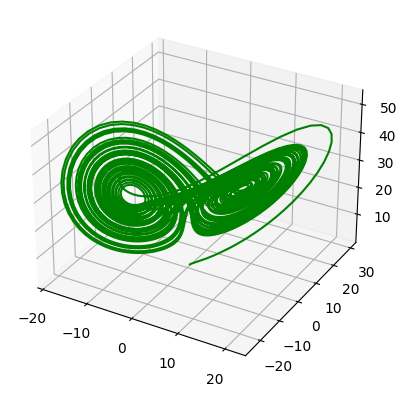

In [3]:
steps = 5000
values = np.zeros([steps,3],dtype=float)
dt = 0.01
sys = LorenzSystem(10,28,(8/3),0.4,0.4,0.4) #Rho, beta and sigma as originally used by Edward Lorenz
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_1 = values[:,0].copy()
y_1 = values[:,1].copy()
z_1 = values[:,2].copy()
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'green')

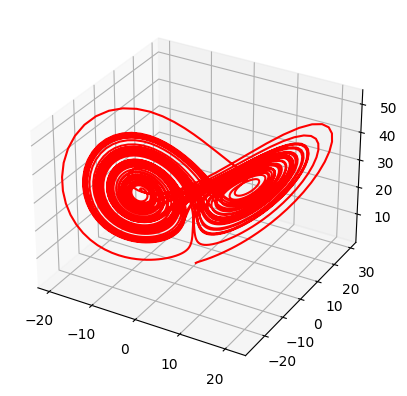

In [4]:
sys = LorenzSystem(10,28,(8/3),0.401,0.401,0.401)
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_2 = values[:,0].copy()
y_2 = values[:,1].copy()
z_2 = values[:,2].copy()
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_2, y_2, z_2, 'red')

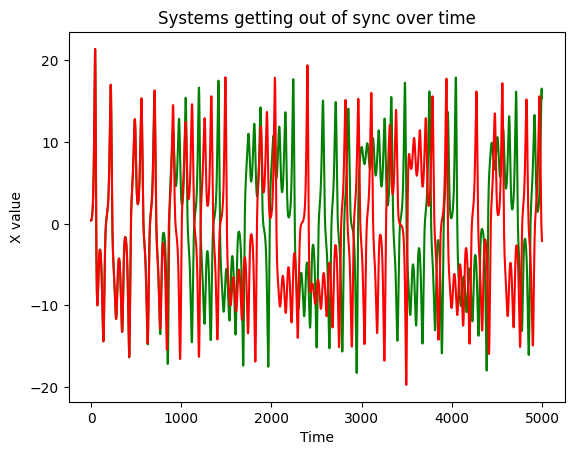

In [5]:
plt.plot(x_1,color='g')
plt.plot(x_2,color="r")
plt.title("Systems getting out of sync over time")
plt.ylabel("X value")
plt.xlabel("Time")
plt.show()

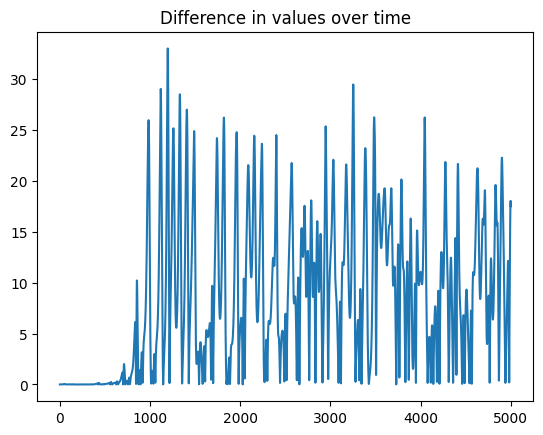

In [6]:
value_change = abs(x_1-x_2)
plt.plot(value_change)
plt.title("Difference in values over time")
plt.show()

## Values of Rho below 1 converge to origin:

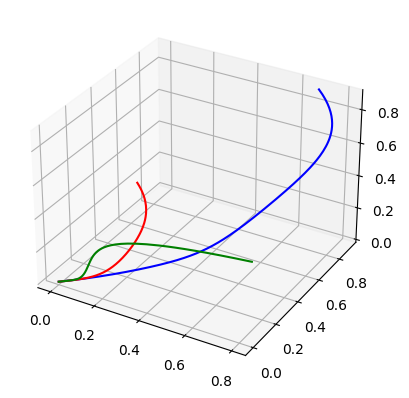

In [7]:
sys = LorenzSystem(10,0.8,(8/3),0.7,0.9,0.9)
steps = 30000
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_3 = values[:,0].copy()
y_3 = values[:,1].copy()
z_3 = values[:,2].copy()

sys = LorenzSystem(10,0.4,(8/3),0.2,0.3,0.5)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_4 = values[:,0].copy()
y_4 = values[:,1].copy()
z_4 = values[:,2].copy()

sys = LorenzSystem(10,0.6,(8/3),0.8,0.1,0.4)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x_5 = values[:,0].copy()
y_5 = values[:,1].copy()
z_5 = values[:,2].copy()



ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_3, y_3, z_3, 'blue')
ax.plot3D(x_4, y_4, z_4, 'red')
ax.plot3D(x_5, y_5, z_5, 'green')

## Some other values resulting in convergence to one of the attractors:

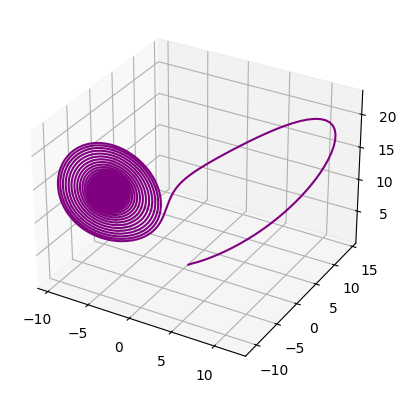

In [8]:
steps = 5000
values = np.zeros([steps,3],dtype=float)
sys = LorenzSystem(10,14,(8/3),0.400,0.400,0.400)
for x in range(steps):
    val = sys.get_values()
    values[x]=val
    sys.update(dt)
x = values[:,0].copy()
y = values[:,1].copy()
z = values[:,2].copy()
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x, y, z, 'purple')

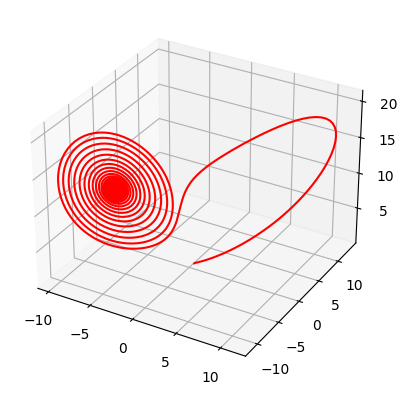

In [9]:
sys = LorenzSystem(10, 13, (8 / 3), 0.400, 0.400, 0.400)
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x = values[:, 0].copy()
y = values[:, 1].copy()
z = values[:, 2].copy()
ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x, y, z, 'red')


### Two solutions, initial state varied by 0.000001 between them. Initially yellow and blue seem to
### follow the same path (blue cannot be seens since it is overwritten by yellow) but eventually diverge

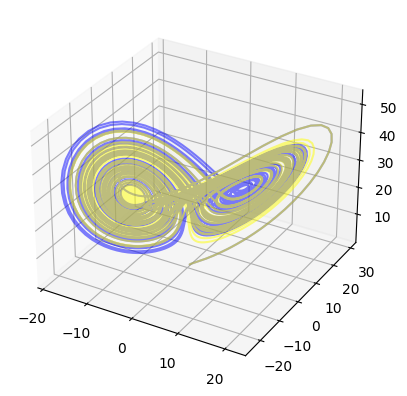

In [10]:
sys = LorenzSystem(10, 28, (8 / 3), 0.400, 0.400, 0.400)
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_1 = values[:, 0].copy()
y_1 = values[:, 1].copy()
z_1 = values[:, 2].copy()
sys = LorenzSystem(10, 28, (8 / 3), 0.400001, 0.400001, 0.400001)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_2 = values[:, 0].copy()
y_2 = values[:, 1].copy()
z_2 = values[:, 2].copy()


ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'blue', alpha=0.5)
ax.plot3D(x_2, y_2, z_2, 'yellow', alpha=0.5)



### Rossler attractors, multiple parameter values

In [11]:
class RosslerSystem:
    def __init__(self,a, b, c, start_x, start_y, start_z):
        self.a=a
        self.b=b
        self.c = c
        self.x=start_x
        self.y=start_y
        self.z=start_z
    def update(self, dt):
        update_x = -1*self.y-self.z
        update_y = self.x+self.a*self.y
        update_z = self.b+self.z*(self.x-self.c)
        self.x+=update_x*dt
        self.y+=update_y*dt
        self.z+=update_z*dt
    def get_values(self):
        return [self.x,self.y,self.z]

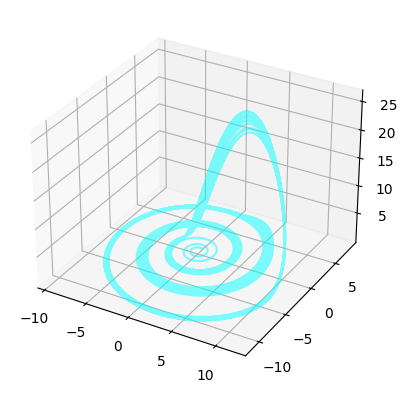

In [12]:
%matplotlib inline
sys = RosslerSystem(0.2, 0.2, 5.7, 0.400, 0.400, 0.400)
steps = 30000
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_1 = values[:, 0].copy()
y_1 = values[:, 1].copy()
z_1 = values[:, 2].copy()

ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'cyan', alpha=0.5)

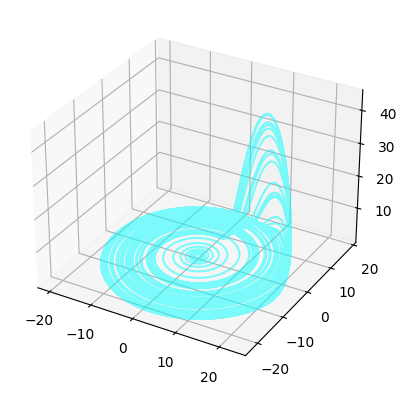

In [13]:
%matplotlib inline
sys = RosslerSystem(0.1, 0.1, 14, 0.400, 0.400, 0.400)
steps = 30000
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_1 = values[:, 0].copy()
y_1 = values[:, 1].copy()
z_1 = values[:, 2].copy()

ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'cyan', alpha=0.5)

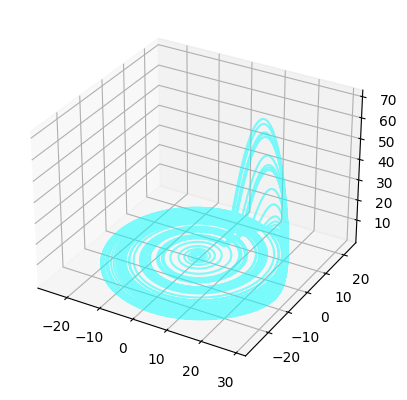

In [14]:
%matplotlib inline
sys = RosslerSystem(0.1, 0.1, 18, 0.400, 0.400, 0.400)
steps = 30000
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_1 = values[:, 0].copy()
y_1 = values[:, 1].copy()
z_1 = values[:, 2].copy()

ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'cyan', alpha=0.5)

#### Sensitive dependence on initial variables

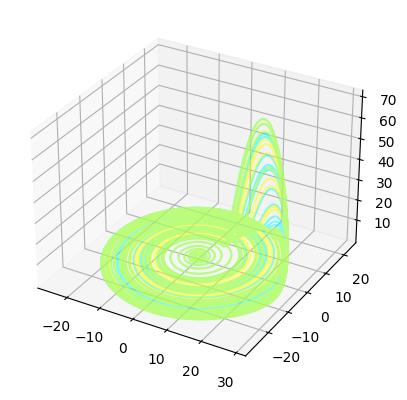

In [15]:
sys = RosslerSystem(0.1, 0.1, 18, 0.400, 0.400, 0.400)
steps = 30000
values = np.zeros([steps, 3], dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_1 = values[:, 0].copy()
y_1 = values[:, 1].copy()
z_1 = values[:, 2].copy()

sys = RosslerSystem(0.1, 0.1, 18, 0.401, 0.401, 0.401)
values = np.zeros([steps, 3], dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_2 = values[:, 0].copy()
y_2 = values[:, 1].copy()
z_2 = values[:, 2].copy()

ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'cyan', alpha=0.5)
ax.plot3D(x_2, y_2, z_2, 'yellow', alpha=0.5)

### More paramaters

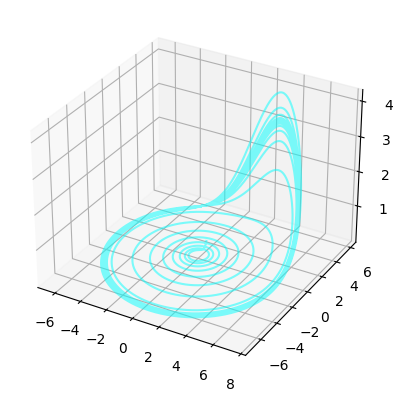

In [16]:
%matplotlib inline
sys = RosslerSystem(0.1, 0.1, 4, 0.400, 0.400, 0.400)
steps = 30000
values = np.zeros([steps,3],dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_1 = values[:, 0].copy()
y_1 = values[:, 1].copy()
z_1 = values[:, 2].copy()

ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'cyan', alpha=0.5)

# A non-chaotic system of this form:

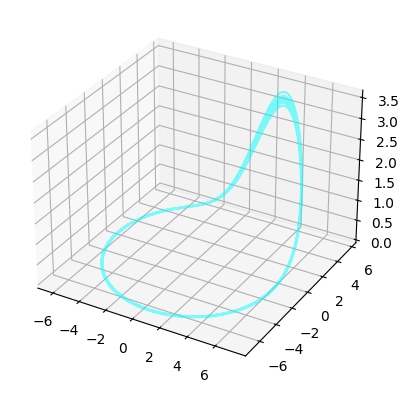

In [26]:
%matplotlib inline

dt = 0.01
ax.plot3D(x_1, y_1, z_1, 'cyan', alpha=0.5)
sys = RosslerSystem(0.1, 0.1, 4.0, -6.2, 0.0, 0.0)
steps = 30000
values = np.zeros([steps, 3], dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_1 = values[:, 0].copy()
y_1 = values[:, 1].copy()
z_1 = values[:, 2].copy()

ax = plt.figure().add_subplot(projection='3d')
ax.plot3D(x_1, y_1, z_1, 'cyan', alpha=0.5)

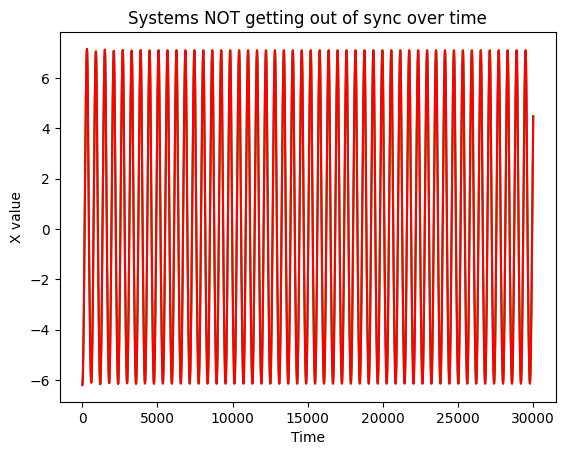

In [29]:
sys = RosslerSystem(0.1, 0.1, 4.0, -6.2001, 0.0001, 0.0001)
steps = 30000
values = np.zeros([steps, 3], dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_2 = values[:, 0].copy()
y_2 = values[:, 1].copy()
z_2 = values[:, 2].copy()

plt.plot(x_1, color='g')
plt.plot(x_2, color="r")
plt.title("Systems NOT getting out of sync over time")
plt.ylabel("X value")
plt.xlabel("Time")
plt.show()

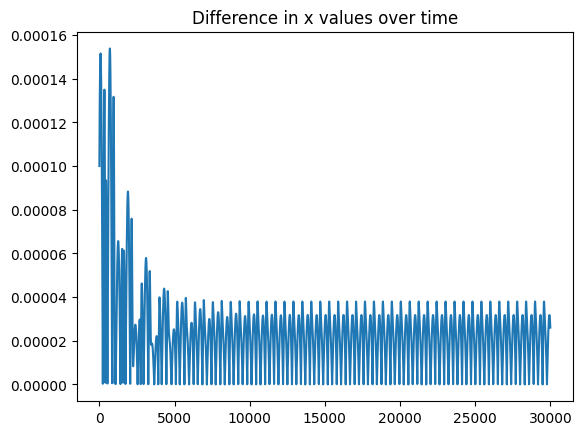

In [28]:
value_change = abs(x_1-x_2)
plt.plot(value_change)
plt.title("Difference in x values over time")
plt.show()

#### Interesting to see that the two systems above were apart the most at the beginning
#### ---> They got attracted to the attractor and stayed together after that point in time

### Seeing how the solutions diverge for other parameter values:

In [18]:
sys = RosslerSystem(0.1, 0.1, 18, 0.400, 0.400, 0.400)
dt=0.00001
steps = 30000000
values = np.zeros([steps, 3], dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_1 = values[:, 0].copy()
y_1 = values[:, 1].copy()
z_1 = values[:, 2].copy()

sys = RosslerSystem(0.1, 0.1, 18, 0.400001, 0.400001, 0.400001)
values = np.zeros([steps, 3], dtype=float)
for x in range(steps):
    val = sys.get_values()
    values[x] = val
    sys.update(dt)
x_2 = values[:, 0].copy()
y_2 = values[:, 1].copy()
z_2 = values[:, 2].copy()


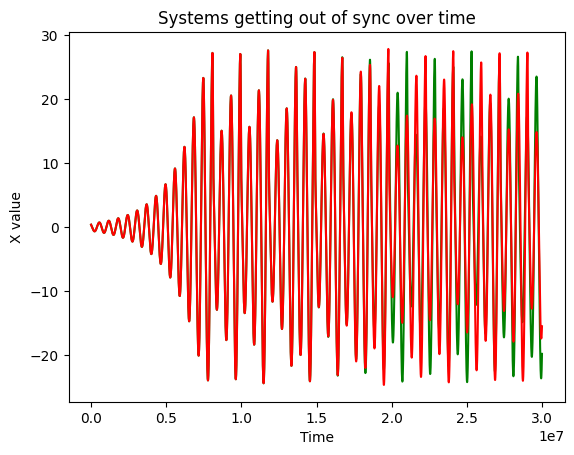

In [19]:
ax.plot3D(x_2, y_2, z_2, 'red')
plt.plot(x_1, color='g')
plt.plot(x_2, color="r")
plt.title("Systems getting out of sync over time")
plt.ylabel("X value")
plt.xlabel("Time")
plt.show()

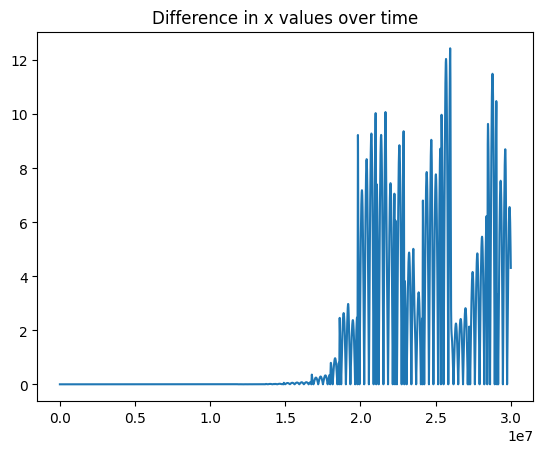

In [25]:
value_change = abs(x_1-x_2)
plt.plot(value_change)
plt.title("Difference in x values over time")
plt.show()

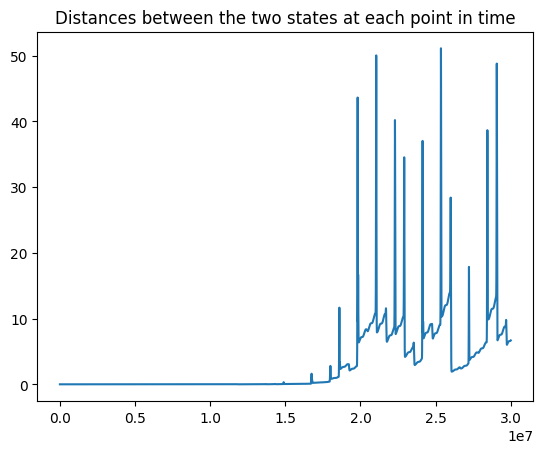

In [24]:
dist = np.sqrt((x_1-x_2)**2+(y_1-y_2)**2+(z_1-z_2)**2)
plt.plot(dist)
plt.title("Distances between the two states at each point in time")
plt.show()